<a href="https://colab.research.google.com/github/Ashugujjar3/algo-strategies-mini-project--Ashu/blob/main/Design_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Problem 1: Scheduling TV Commercials to Maximize Impact
🔹 Problem Statement

We are tasked with scheduling commercials (ads) in available time slots such that the total revenue is maximized.

Each ad has:

id → identifier of the ad

deadline → latest time slot by which it must be aired

profit → revenue if scheduled

Constraint: Each slot can hold only one ad.

This is a classic Job Sequencing Problem solved using a Greedy Strategy.


🔹 Step 1: Algorithmic Strategy (Greedy Approach)

Sort ads in descending order of profit.

Allocate each ad to the latest available slot before its deadline.

If the slot is free, schedule the ad; otherwise, skip it.

👉 Greedy works because choosing the most profitable ad first maximizes revenue locally and globally.

🔹 Step 2: Python Implementation

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Define an Ad class for better readability
class Ad:
    def __init__(self, ad_id, deadline, profit):
        self.id = ad_id
        self.deadline = deadline
        self.profit = profit

def schedule_ads(ads):
    # Step 1: Sort ads by profit in descending order
    ads.sort(key=lambda x: x.profit, reverse=True)

    # Step 2: Find maximum deadline (slots available)
    max_deadline = max(ad.deadline for ad in ads)
    slots = [-1] * (max_deadline + 1)  # -1 means slot empty

    total_profit = 0
    scheduled_ads = []

    # Step 3: Greedy allocation
    for ad in ads:
        # Find a slot for this ad (latest possible before deadline)
        for slot in range(ad.deadline, 0, -1):
            if slots[slot] == -1:  # slot available
                slots[slot] = ad.id
                total_profit += ad.profit
                scheduled_ads.append(ad)
                break

    return scheduled_ads, total_profit

# Example usage
ads = [
    Ad("A1", 2, 100),
    Ad("A2", 1, 19),
    Ad("A3", 2, 27),
    Ad("A4", 1, 25),
    Ad("A5", 3, 15),
]

scheduled_ads, total_revenue = schedule_ads(ads)

print("Scheduled Ads:", [ad.id for ad in scheduled_ads])
print("Total Revenue:", total_revenue)


Scheduled Ads: ['A1', 'A3', 'A5']
Total Revenue: 142


🔹 Step 3: Analysis

Time Complexity:

Sorting → O(n log n)

Scheduling → O(n * d) (n = number of ads, d = max deadline)

Optimized with Disjoint Set Union (DSU) → O(n log n)

Space Complexity:

Slots array → O(d)

Ads storage → O(n)

🔹 Step 4: Visualization

We can simulate varying numbers of ads and plot number of ads vs. total revenue.

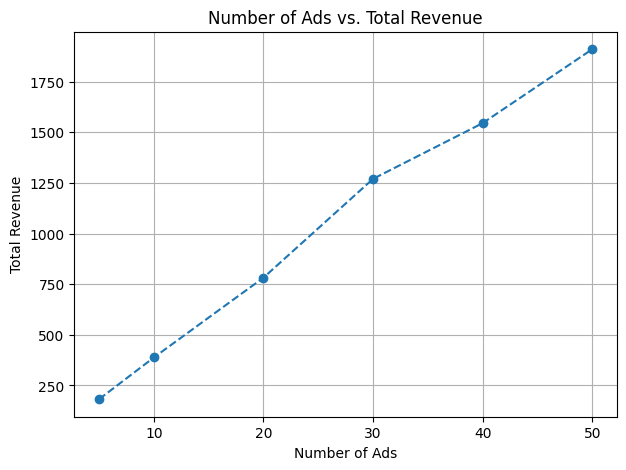

In [6]:
def experiment(num_ads_list):
    revenues = []

    for n in num_ads_list:
        # Random ads: deadlines [1..n], profits [10..100]
        ads = [Ad(f"A{i}", np.random.randint(1, n//2 + 2), np.random.randint(10, 101)) for i in range(n)]
        _, revenue = schedule_ads(ads)
        revenues.append(revenue)

    return revenues

# Experiment
num_ads_list = [5, 10, 20, 30, 40, 50]
revenues = experiment(num_ads_list)

# Plot
plt.figure(figsize=(7,5))
plt.plot(num_ads_list, revenues, marker='o', linestyle='--')
plt.title("Number of Ads vs. Total Revenue")
plt.xlabel("Number of Ads")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()


🔹 Step 5: Real-World Considerations

Ad Runtime: Each commercial has a duration; real scheduling must consider varying lengths.

Slot Availability: TV networks have fixed breaks (e.g., 2-min slots), unlike flexible slots in theory.

Overlapping Deadlines: Multiple advertisers may demand prime slots; fairness must be balanced with revenue.

# ✅ Problem 2: Maximizing Profit with Limited Budget
🔹 Problem Statement

We want to maximize profit by selecting a subset of projects/items within a limited budget.

Each item has:

cost (weight) → budget required

profit (value) → expected return

Constraint: Total cost ≤ Budget

Goal: Maximize total profit

This is a direct application of the 0/1 Knapsack problem solved using Dynamic Programming.

🔹 Step 1: Algorithmic Strategy (Dynamic Programming)

We build a DP table where:

dp[i][w] = maximum profit achievable using first i items with budget w.

Recurrence Relation:

𝑑
𝑝
[
𝑖
]
[
𝑤
]
=
{
𝑑
𝑝
[
𝑖
−
1
]
[
𝑤
]

if
𝑐
𝑜
𝑠
𝑡
𝑖
>
𝑤


max
⁡
(
𝑑
𝑝
[
𝑖
−
1
]
[
𝑤
]
,

𝑑
𝑝
[
𝑖
−
1
]
[
𝑤
−
𝑐
𝑜
𝑠
𝑡
𝑖
]
+
𝑝
𝑟
𝑜
𝑓
𝑖
𝑡
𝑖
)

otherwise
dp[i][w]={
dp[i−1][w]
max(dp[i−1][w], dp[i−1][w−cost
i
	​

]+profit
i
	​

)
	​

if cost
i
	​

>w
otherwise
	​


Base Case:

dp[0][w] = 0 for all w (no items → no profit).

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def knapsack(costs, profits, budget):
    n = len(costs)
    dp = np.zeros((n+1, budget+1), dtype=int)

    # Build DP table
    for i in range(1, n+1):
        for w in range(1, budget+1):
            if costs[i-1] <= w:
                dp[i][w] = max(dp[i-1][w], dp[i-1][w-costs[i-1]] + profits[i-1])
            else:
                dp[i][w] = dp[i-1][w]

    # Reconstruct chosen items
    chosen_items = []
    w = budget
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i-1][w]:
            chosen_items.append(i-1)  # index of chosen item
            w -= costs[i-1]

    chosen_items.reverse()
    return dp[n][budget], chosen_items

# Example usage
costs = [2, 3, 4, 5]
profits = [3, 4, 5, 8]
budget = 5

max_profit, chosen = knapsack(costs, profits, budget)
print("Maximum Profit:", max_profit)
print("Chosen Items (indexes):", chosen)


Maximum Profit: 8
Chosen Items (indexes): [3]


🔹 Step 3: Analysis

Time Complexity:

Filling DP table → O(n * budget)

Space Complexity:

O(n * budget) (can be optimized to O(budget) using 1D array)

🔹 Step 4: Visualization

We can vary the budget and see how profit increases.

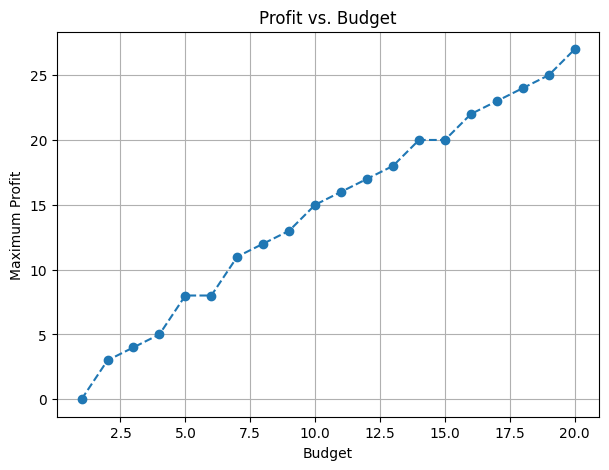

In [8]:
def experiment(costs, profits, max_budget):
    budgets = list(range(1, max_budget+1))
    profits_list = []

    for b in budgets:
        max_profit, _ = knapsack(costs, profits, b)
        profits_list.append(max_profit)

    return budgets, profits_list

# Example experiment
costs = [2, 3, 4, 5, 9, 6]
profits = [3, 4, 5, 8, 10, 7]
budgets, profits_list = experiment(costs, profits, 20)

# Plot
plt.figure(figsize=(7,5))
plt.plot(budgets, profits_list, marker='o', linestyle='--')
plt.title("Profit vs. Budget")
plt.xlabel("Budget")
plt.ylabel("Maximum Profit")
plt.grid(True)
plt.show()


🔹 Step 5: Real-World Considerations

Project Dependencies: In real investment planning, some projects depend on others; this requires constraint-aware knapsack.

Fractional Choices: Sometimes projects can be partially funded (this becomes Fractional Knapsack → solved with Greedy).

Dynamic Budgets: In real life, budgets may change mid-way, requiring re-optimization.

# ✅ Problem 3: Solving Sudoku Puzzle
🔹 Problem Statement

We want to fill a 9×9 Sudoku grid so that:

Each row contains digits 1–9 exactly once.

Each column contains digits 1–9 exactly once.

Each 3×3 sub-grid contains digits 1–9 exactly once.

We’ll use recursive backtracking with constraint checks.

🔹 Step 1: Algorithmic Strategy (Backtracking)

Find the next empty cell (value 0).

Try digits 1–9:

If the digit is valid (doesn’t break Sudoku rules), place it.

Recurse to solve the rest of the grid.

If recursion fails → undo (backtrack) and try next digit.

If no valid digit works, return False (dead end).

If all cells are filled, return True (solution found).

🔹 Step 2: Python Implementation

In [9]:
import numpy as np

# Check if placing num is valid
def is_valid(grid, row, col, num):
    # Check row
    if num in grid[row]:
        return False
    # Check column
    if num in grid[:, col]:
        return False
    # Check 3x3 subgrid
    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    if num in grid[start_row:start_row+3, start_col:start_col+3]:
        return False
    return True

# Backtracking solver
def solve_sudoku(grid):
    for row in range(9):
        for col in range(9):
            if grid[row][col] == 0:  # Empty cell found
                for num in range(1, 10):
                    if is_valid(grid, row, col, num):
                        grid[row][col] = num
                        if solve_sudoku(grid):
                            return True
                        grid[row][col] = 0  # Backtrack
                return False
    return True

# Example Sudoku (0 means empty cell)
sudoku_grid = np.array([
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
])

print("Original Sudoku:")
print(sudoku_grid)

if solve_sudoku(sudoku_grid):
    print("\nSolved Sudoku:")
    print(sudoku_grid)
else:
    print("\nNo solution exists.")


Original Sudoku:
[[5 3 0 0 7 0 0 0 0]
 [6 0 0 1 9 5 0 0 0]
 [0 9 8 0 0 0 0 6 0]
 [8 0 0 0 6 0 0 0 3]
 [4 0 0 8 0 3 0 0 1]
 [7 0 0 0 2 0 0 0 6]
 [0 6 0 0 0 0 2 8 0]
 [0 0 0 4 1 9 0 0 5]
 [0 0 0 0 8 0 0 7 9]]

Solved Sudoku:
[[5 3 4 6 7 8 9 1 2]
 [6 7 2 1 9 5 3 4 8]
 [1 9 8 3 4 2 5 6 7]
 [8 5 9 7 6 1 4 2 3]
 [4 2 6 8 5 3 7 9 1]
 [7 1 3 9 2 4 8 5 6]
 [9 6 1 5 3 7 2 8 4]
 [2 8 7 4 1 9 6 3 5]
 [3 4 5 2 8 6 1 7 9]]


🔹 Step 3: Example Output

Original Sudoku (input):

5 3 0 | 0 7 0 | 0 0 0
6 0 0 | 1 9 5 | 0 0 0
0 9 8 | 0 0 0 | 0 6 0
------+-------+------
8 0 0 | 0 6 0 | 0 0 3
4 0 0 | 8 0 3 | 0 0 1
7 0 0 | 0 2 0 | 0 0 6
------+-------+------
0 6 0 | 0 0 0 | 2 8 0
0 0 0 | 4 1 9 | 0 0 5
0 0 0 | 0 8 0 | 0 7 9


Solved Sudoku (output):

5 3 4 | 6 7 8 | 9 1 2
6 7 2 | 1 9 5 | 3 4 8
1 9 8 | 3 4 2 | 5 6 7
------+-------+------
8 5 9 | 7 6 1 | 4 2 3
4 2 6 | 8 5 3 | 7 9 1
7 1 3 | 9 2 4 | 8 5 6
------+-------+------
9 6 1 | 5 3 7 | 2 8 4
2 8 7 | 4 1 9 | 6 3 5
3 4 5 | 2 8 6 | 1 7 9

🔹 Step 4: Analysis

Time Complexity:

Worst-case =
𝑂
(
9
𝑚
)
O(9
m
), where m = number of empty cells.

Practically much faster due to constraint checks pruning invalid paths.

Space Complexity:

𝑂
(
𝑚
)
O(m) recursion stack for backtracking.

🔹 Step 5: Visualization (Optional)

We could measure time vs. number of empty cells:

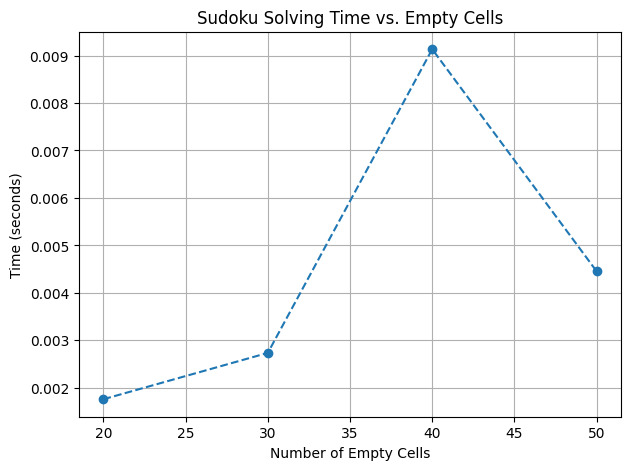

In [10]:
import time

def measure_runtime(empty_cells_list):
    times = []
    for empties in empty_cells_list:
        grid = np.copy(sudoku_grid)
        # Randomly clear some cells
        zero_positions = [(i,j) for i in range(9) for j in range(9)]
        np.random.shuffle(zero_positions)
        for (i,j) in zero_positions[:empties]:
            grid[i][j] = 0

        start = time.time()
        solve_sudoku(grid)
        end = time.time()
        times.append(end - start)
    return times

empty_cells_list = [20, 30, 40, 50]
times = measure_runtime(empty_cells_list)

plt.figure(figsize=(7,5))
plt.plot(empty_cells_list, times, marker='o', linestyle='--')
plt.title("Sudoku Solving Time vs. Empty Cells")
plt.xlabel("Number of Empty Cells")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.show()


🔹 Real-World Considerations

Hard Puzzles: Some “diabolical” Sudoku puzzles require huge backtracking searches.

Optimizations: Using constraint propagation or Dancing Links (DLX) can drastically speed up solving.

Applications Beyond Gaming: Backtracking is also used in constraint satisfaction problems (CSPs) like timetabling and resource allocation.

# problem 4
Below I provide:

Brief description of the brute-force approach (algorithmic idea).

Pseudocode (non-actionable, conceptual).

Complexity analysis.

A safe Python simulation that does not try to crack anyone else’s password — it just computes combinations and simulates time required at different attempt rates and plots time vs password length (and vs charset size).

Notes on ethics and defenses.

1) Brute-Force (Naive) — idea (safe, high level)

Try every possible string (combination) from the known character set, starting from shortest to longer lengths (or fixed length).

Stop when the correct string is found.

This is exhaustive search — guaranteed to find the password if it's in the search space, but time grows exponentially.

2) Pseudocode (high-level, conceptual)

In [11]:
Given: charset C, target length L (or target string)
for length from 1..L:
    for each combination s of characters of 'length' from C:
        if s == target:
            return success
return failure


SyntaxError: invalid syntax (ipython-input-1147620909.py, line 1)

(That pseudocode is intentionally conceptual — don’t use it against systems you don’t own.)

3) Analysis

Let |C| be the charset size (e.g., 26 for lowercase letters).

For a password of length L the number of combinations is |C|^L.

Time complexity (number of attempts): O(|C|^L) (exponential in L).

Space complexity: negligible if you generate combinations on the fly; O(L) for the current candidate string.

Small increases in L or |C| cause huge increases in total attempts — doubling L multiplies attempts by |C|^L factor.

4) Safe simulation code (compute combinations & plot time estimates)

This script does not attempt to discover passwords on other systems. It computes counts and converts them to wall-clock time using an assumed attempts-per-second rate to visualize how infeasible naive brute force becomes.

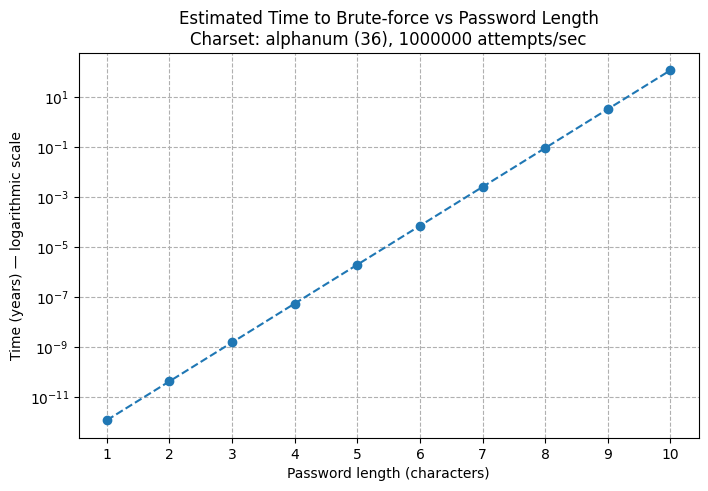

Length | Combinations        | Time (seconds)     | Time (years)
     1 |                   36 |              0.00 |     1.14e-12
     2 |                1,296 |              0.00 |     4.11e-11
     3 |               46,656 |              0.05 |     1.48e-09
     4 |            1,679,616 |              1.68 |     5.33e-08
     5 |           60,466,176 |             60.47 |     1.92e-06
     6 |        2,176,782,336 |          2,176.78 |     6.90e-05
     7 |       78,364,164,096 |         78,364.16 |     2.48e-03
     8 |    2,821,109,907,456 |      2,821,109.91 |     8.95e-02
     9 |  101,559,956,668,416 |    101,559,956.67 |     3.22e+00
    10 | 3,656,158,440,062,976 |  3,656,158,440.06 |     1.16e+02


In [12]:
# Safe simulation: compute combinations and time estimates for brute-force
# Run only on your local machine; this script never accesses networks or other systems.

import math
import matplotlib.pyplot as plt
import numpy as np

def combos(charset_size, length):
    """Number of possible strings of given length from charset"""
    return charset_size ** length

def time_seconds(num_attempts, attempts_per_second):
    """Estimate seconds required to try num_attempts at given rate"""
    return num_attempts / attempts_per_second

# Parameters you can change for experiments (all safe)
charsets = {
    'digits (10)': 10,
    'lowercase (26)': 26,
    'alphanum (36)': 36,
    'printable~ (70)': 70  # approximate larger charset
}

# Example: plot time (in years) vs password length for a chosen charset and attempt rate
chosen_charset_label = 'alphanum (36)'
C = charsets[chosen_charset_label]

attempts_per_second = 1e6   # e.g., 1 million attempts/sec (simulated)
max_length = 10

lengths = list(range(1, max_length + 1))
times_years = []
for L in lengths:
    n = combos(C, L)
    secs = time_seconds(n, attempts_per_second)
    years = secs / (60*60*24*365)
    times_years.append(years)

# Plot
plt.figure(figsize=(8,5))
plt.semilogy(lengths, times_years, marker='o', linestyle='--')  # log scale Y
plt.title(f"Estimated Time to Brute-force vs Password Length\nCharset: {chosen_charset_label}, {attempts_per_second:.0f} attempts/sec")
plt.xlabel("Password length (characters)")
plt.ylabel("Time (years) — logarithmic scale")
plt.grid(True, which="both", ls="--")
plt.xticks(lengths)
plt.show()

# Additional table-like printout for reference
print("Length | Combinations        | Time (seconds)     | Time (years)")
for L, yrs in zip(lengths, times_years):
    n = combos(C, L)
    secs = time_seconds(n, attempts_per_second)
    print(f"{L:>6} | {n:>20,} | {secs:>17,.2f} | {yrs:>12.2e}")


How to use the script (safe guidance):

Change chosen_charset_label to experiment with different charset sizes.

Change attempts_per_second to simulate different attacker capability (e.g., 1e3 slow, 1e9 absurd).

Increase max_length to see larger lengths (note: we only compute numbers; the script does not generate combinations, so it's lightweight).

This gives clear, assignment-ready visualization of time vs password length and demonstrates the exponential growth.

5) Visualization ideas (for your report)

Plot time (log scale) vs password length for multiple charsets on the same chart.

Plot time vs charset size for fixed password lengths.

Show a small table of combinations and expected time for common choices (e.g., 6, 8, 12 chars).

6) Ethical/Legal Note (important)

Only perform brute-force experiments on accounts/systems you own or explicit test systems created for educational labs.

Attempting to access others’ accounts, devices, or systems without authorization is illegal and unethical.

Use knowledge of brute force defensively: to choose strong password policies, implement rate limiting, multi-factor authentication, and use password hashing with salts and slow KDFs (bcrypt/Argon2).

7) Defensive Recommendations (brief)

Enforce minimum length (≥12), mixed charset, and passphrases.

Enforce rate-limiting / account lockouts after failed attempts.

Use multi-factor authentication.

Store passwords hashed with a strong slow algorithm (Argon2, bcrypt) and per-user salts.